<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you for sending the updated version of the project. My new comments have digit 2, but there's nothing that needs to be fixed. The project is accepted, good luck! 
    

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Allen! I am a reviewer on this project. Congratulations on submitting your project! 🎉

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for submitting your project! You did a great job here!
    
    
    
- You have successfully explored and prepared the dataframes;


- Merged pivot tables; 


- Calculated revenue; 


- Displayed and analyzed distributions; 


- Conducted statistical tests; 


- Wrote an excellent conclusion! 


However, there are several issues that need your attention. I tried to outline and explain them in my comments. Would you take a look?     
    
<hr>
    
Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

# Best Revenue Stream on Two Plans


 I'll be performing a preliminary analysis finding which plan: Surf or Ultimate, on 500 Megaline clients. Performs the best revenue wise. With data on where clients are from, which plan they use, and the number of calls they've made all from data in 2018. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good introduction! 
    
</div>

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np

from scipy import stats as st
import math as mt

import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv', parse_dates=['call_date'])
internet_df = pd.read_csv('/datasets/megaline_internet.csv', parse_dates=['session_date'])
messages_df = pd.read_csv('/datasets/megaline_messages.csv', parse_dates=['message_date'])
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv', parse_dates=['reg_date'])

#Making sure its displayed properly
display(calls_df.head())
display(internet_df.head())
display(messages_df.head())
display(plans_df.head())
users_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Here I observe that the column 'duration' is not rounded in the calls dataframe.
Also, the column 'mb_used' is not rounded either in the internet dataframe.

I switched the wrong datatypes, 'reg_date', 'message_date', 'session_date', 'call_date', to datetime datatype.

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()

plans_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [4]:
# Print a sample of data for plans
display(plans_df.sample(2))


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


## Fix data

## Enrich data

In [5]:
#adding clarity on conversion of mb to gb
plans_df['gb_per_month_included'] = (plans_df['mb_per_month_included'] / 1024).astype(int)

plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


Added GB column to make it an easier to manipulate data.

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
users_df.info()
users_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [7]:
# Print a sample of data for users
users_df.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
91,1091,Taylor,Oliver,38,"Riverside-San Bernardino-Ontario, CA MSA",2018-05-04,ultimate,NaN
150,1150,Earlie,Giles,46,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-19,ultimate,NaN
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN
457,1457,Janean,Lynch,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaN
53,1053,Piper,Espinoza,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-30,surf,NaN


There is a wrong data type - 'churn_date' column. As well as, NaN values.

### Fix Data

In [43]:
#fixing missing values
users_df['churn_date'] = users_df['churn_date'].replace('still using service', 'NaT')
display(users_df)
users_df.info()

#changing data type to datetime
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

print()
#checking for duplicates
display(users_df.duplicated().sum())
print()

users_df.info()
users_df.sample(10)

print(users_df['user_id'].duplicated().sum())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB



0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
0


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Are there any duplicates in `user_id`? 
    
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Good! 
    
</div>

<div class="alert alert-info">
<h2> Student's comment</h2>

Checked the specific column and found no duplicates. Wrote it in the conclusion of the section.
  
</div>



<font color='red'>  </font>

Switched churn date to datetime for the values that are applicable to datetime. The NaT (Not a Time) values represent users still using service. These NaT values still have purpose for that reason, I will leave them as is. - there are no duplicates as well.

### Enrich Data

## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()
calls_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [10]:
# Print a sample of data for calls
calls_df.sample(5)


,id,user_id,call_date,duration
125753,1445_168,1445,2018-04-04,0.00
78159,1280_140,1280,2018-12-01,0.00
83599,1305_3,1305,2018-07-24,4.99
64676,1235_6,1235,2018-11-18,0.00
93669,1334_1037,1334,2018-11-02,0.00


Duration must be rounded up as any extra second are rounded to the next minute.

### Fix data

In [11]:
#switching object datatype to datetime datatype
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

#rounding duration of calls to next minute
calls_df['duration'] = calls_df['duration'].apply(mt.ceil)
#checking for duplicates
calls_df.duplicated().sum()

calls_df.info()
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Correct!     
</div>

Corrected data type to datetime for easier aggregation. Also fixed the duration of call seconds by rounding up to next minute as advised.

### Enrich data

In [12]:
#adding month column 
calls_df['month'] = calls_df['call_date'].dt.month_name()
calls_df.sample(10)

,id,user_id,call_date,duration,month
52841,1190_17,1190,2018-12-23,6,December
65897,1238_108,1238,2018-12-19,3,December
83183,1301_97,1301,2018-11-29,13,November
10657,1047_5,1047,2018-12-14,0,December
43965,1159_561,1159,2018-10-20,15,October
122803,1434_96,1434,2018-07-01,6,July
90413,1328_43,1328,2018-05-14,7,May
137327,1498_257,1498,2018-07-21,8,July
32287,1122_125,1122,2018-05-30,11,May
113200,1397_1017,1397,2018-08-19,0,August


Added month column to easily extract data from month to month.  zero indicates a user did not use service.

## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()
messages_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [14]:
# Print a sample of data for messages
messages_df.sample(5)


,id,user_id,message_date
56713,1361_65,1361,2018-07-01
65255,1419_64,1419,2018-12-16
52965,1339_99,1339,2018-07-15
6845,1057_169,1057,2018-11-01
28528,1174_318,1174,2018-10-15


Nothing wrong with data here.


### Fix data

In [15]:
#checking for duplicates
messages_df.duplicated().sum()

0

### Enrich data

In [16]:
#adding month column
messages_df['month'] = messages_df['message_date'].dt.month_name()

messages_df.sample(10)

,id,user_id,message_date,month
53532,1340_58,1340,2018-12-13,December
60698,1382_351,1382,2018-09-16,September
66025,1431_64,1431,2018-11-16,November
41943,1270_54,1270,2018-12-16,December
32286,1200_38,1200,2018-11-30,November
69530,1451_227,1451,2018-09-19,September
54395,1343_495,1343,2018-11-12,November
35897,1236_175,1236,2018-11-06,November
5104,1046_166,1046,2018-08-01,August
60101,1381_214,1381,2018-09-21,September


for easier visualization and aggregation added month column.

## Internet

In [17]:
# Print the general/summary information about the internet DataFrame
internet_df.info()

internet_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The zero seen here indicates a user did not use it.

In [18]:
# Print a sample of data for the internet traffic
internet_df.sample(5)


,id,user_id,session_date,mb_used
43364,1193_183,1193,2018-11-24,363.41
87973,1406_290,1406,2018-10-14,132.34
17079,1077_199,1077,2018-03-17,557.56
70907,1331_158,1331,2018-08-16,224.88
28944,1132_403,1132,2018-04-27,746.71


Already fixed the wrong data type nothing wrong here. 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
There are some zeros in **calls** and **internet** dataframes. We can write something about them.

</div>

### Fix data

In [19]:
#checking for duplicates
internet_df.duplicated().sum()
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

### Enrich data

In [20]:
#adding month column
internet_df['month'] = internet_df['session_date'].dt.month_name()

internet_df.sample(10)

,id,user_id,session_date,mb_used,month
36558,1164_241,1164,2018-05-10,210.81,May
94524,1440_162,1440,2018-10-29,353.92,October
52143,1235_23,1235,2018-11-27,0.00,November
103707,1496_15,1496,2018-09-18,562.82,September
52678,1237_58,1237,2018-09-10,442.42,September
85889,1400_17,1400,2018-09-24,429.59,September
76566,1359_249,1359,2018-08-22,813.79,August
43850,1194_268,1194,2018-09-09,459.54,September
64729,1299_17,1299,2018-10-12,85.38,October
89698,1414_154,1414,2018-12-05,0.00,December


Added another string month column for easier aggregation.

## Study plan conditions

In [21]:
# Print out the plan conditions and make sure they are clear for you
display(plans_df)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


<H5>Plan: Surf
    Monthly Charge: $20 
    
    Included: 500 minutes, 50 messages, 15 GB of data.
    Extra Charges: $0.03 per minute, $0.03 per message, $10 per GB of data.
   
Plan: Ultimate
    Monthly Charge: $70
    
    Included: 3000 minutes, 1000 messages, 30 GB of data.
    Extra Charges: $0.01 per minute, $0.01 per message, $7 per GB of data.
    

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [22]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls_df.groupby(['user_id', 'month'])['duration'].count().reset_index()

display(calls_per_month)

,user_id,month,duration
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65
...,...,...,...
2253,1498,September,45
2254,1499,December,65
2255,1499,November,45
2256,1499,October,53


In [23]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index()

display(minutes_per_month.head(10))


,user_id,month,duration
0,1000,December,124
1,1001,August,182
2,1001,December,412
3,1001,November,426
4,1001,October,393
5,1001,September,315
6,1002,December,384
7,1002,November,386
8,1002,October,59
9,1003,December,1104



<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
You can use the `agg` method to define a list of aggregation functions: 
    
</div>

<div class="alert alert-info">
<h2> Student's comment</h2>

Thank you for that feedback:)
</div>



<font color='red'></font>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Glad to help! 
    
</div>

In [24]:
# Reviewer's code

calls_df.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])

count  sum
user_id month                
1000    December      16  124
1001    August        27  182
        December      56  412
        November      64  426
        October       65  393
...                  ...  ...
1498    September     45  363
1499    December      65  496
        November      45  308
        October       53  385
        September     41  346

[2258 rows x 2 columns]

In [25]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = messages_df.groupby(['user_id', 'month'])['id'].count().reset_index()

display(messages_per_month.head(10))


,user_id,month,id
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
5,1001,September,44
6,1002,December,41
7,1002,November,32
8,1002,October,15
9,1003,December,50


In [26]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_used = internet_df.groupby(['user_id','month'])['mb_used'].sum().reset_index()

display(internet_used.head(10))

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
5,1001,September,13314.82
6,1002,December,14396.24
7,1002,November,19345.08
8,1002,October,6552.01
9,1003,December,27044.14


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [27]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = calls_per_month.merge(right=minutes_per_month, on=['user_id', 'month'], how='outer')

merged_df = merged_df.merge(right=messages_per_month, on=['user_id', 'month'], how='outer')

merged_df = merged_df.merge(right=internet_used, on=['user_id', 'month'], how='outer')

#changing column names
merged_df.columns = ['user_id', 'month', 'calls', 'minutes', 'messages', 'mb_used']

#reset index and filled NaN
merged_df['minutes'] = merged_df['minutes'].fillna(0)
merged_df['calls'] = merged_df['calls'].fillna(0)
merged_df['messages'] = merged_df['messages'].fillna(0)
merged_df['mb_used'] = merged_df['mb_used'].fillna(0)

merged_df.reset_index(drop=True)


print(merged_df.isna().sum())

user_id     0
month       0
calls       0
minutes     0
messages    0
mb_used     0
dtype: int64


**Since there were NaN values I filled them in with zeros for the sake of SDA/usability.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Exactly! Everything is correct here.     
</div>

Now we can add the plan info along with the current information in the merged dataframe.

In [28]:
# Add the plan information
plan_information = users_df[['user_id', 'plan']]

#changing column names
plan_information.columns = ['user_id', 'plan_name']

merged_df = merged_df.merge(right=plan_information, on='user_id')
merged_df = merged_df.merge(right=plans_df, on='plan_name')

#sorting data
merged_df = merged_df.sort_values(by='user_id').reset_index(drop=True)
display(merged_df.head(10))

,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,December,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,30
1,1001,October,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,15
2,1001,September,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,15
3,1001,November,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,15
4,1001,August,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,15
5,1001,December,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,15
6,1002,October,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,15
7,1002,November,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,15
8,1002,December,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,15
9,1003,December,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,15


Here we have merged important information on stats in the plans dataframe to allow us to see important variables according to each user. Which we can use in the function below to retrieve monthly earnings on each client. Which will include minutes, messages, and also megabytes on all clients over limits and not over limits.

In [29]:
# Calculate the monthly revenue for each user  
def calculate_monthly_revenue(row):
    #user usage
    messages = row['messages']
    minutes =  row['minutes']
    
    #conversion mb - gb of user data
    mb_used = row['mb_used'] if not pd.isna(row['mb_used']) else 0
    gb_usage = mt.ceil(mb_used / 1024)
    
    #limit of plans
    minutes_lim = row['minutes_included']
    messages_lim = row['messages_included']
    gb_lim = row['gb_per_month_included']
    
    #fees
    messages_over = row['usd_per_message']
    minutes_over = row['usd_per_minute']
    gb_over = row['usd_per_gb']
    monthly_rate = row['usd_monthly_pay']
    
    #initialization
    min_earnings = 0
    message_earnings = 0
    gb_earnings = 0
    
    #calculating overrage
    if minutes > minutes_lim:
        min_earnings = (minutes - minutes_lim) * minutes_over
    if messages > messages_lim:
        message_earnings = (messages - messages_lim) * messages_over
    if gb_usage > gb_lim:
        gb_earnings = (gb_usage - gb_lim) * gb_over
   
    #total earnings    
    earnings = monthly_rate + message_earnings + min_earnings + gb_earnings
    
    return earnings


#creating a new column for income
merged_df['income'] = merged_df.apply(calculate_monthly_revenue, axis=1)

display(merged_df.head(10))

,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,income
0,1000,December,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,30,70.00
1,1001,October,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,15,90.09
2,1001,September,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,15,20.00
3,1001,November,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,15,60.00
4,1001,August,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,15,20.00
5,1001,December,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,15,60.00
6,1002,October,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,15,20.00
7,1002,November,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,15,60.00
8,1002,December,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,15,20.00
9,1003,December,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,15,158.12


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Correct! By the way, there's a function that returns the maximum between 2 values. With this function, you will not need to check if-else statements.
</div>

```python

max(0, (minutes - minutes_lim) * minutes_over)
```

## Study user behaviour

Continuing the analysis requires a visual to see relationships between the variables above. I will be presenting these below!

### Calls

Here we will be finding the differences in call duration average from surf to ultimate and seeing if there is a distinct difference.

'average duration of surf call is: 2.93'

'difference between ultimate and surf average calls is: 2.21'

'Average duration of ultimate call is: 6.47'

'The average ultimate call is over twice as long as the average surf call.'

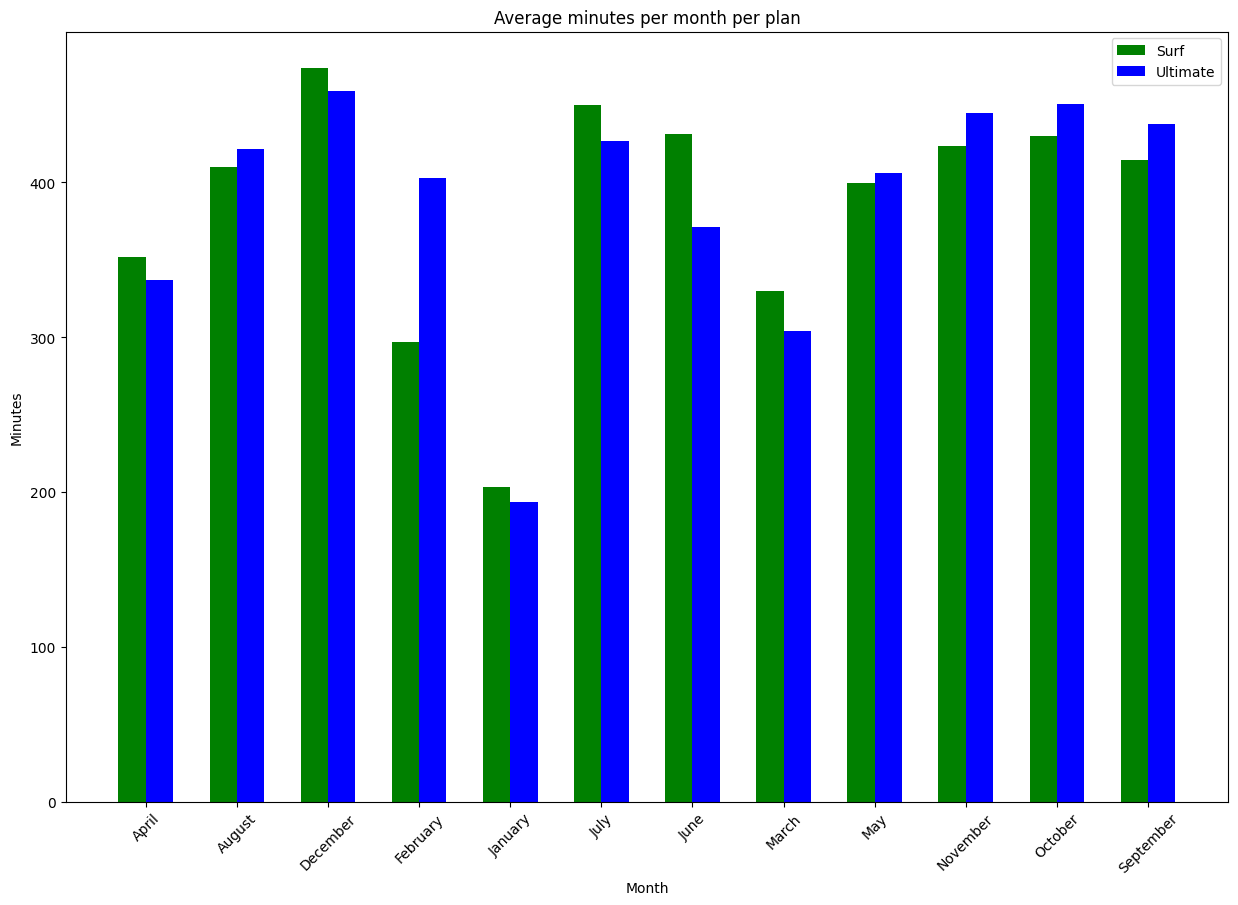

In [30]:
# Average surf call
surf_clients = merged_df[merged_df['plan_name'] == 'surf']
#grouping the average call of each customer
num_clients = len(surf_clients)
surf_client_calls = surf_clients.groupby('month')['minutes'].mean().sum() / num_clients
#rounding number down, second decimal point
surf_client_calls = round(surf_client_calls, 2)

display(f'average duration of surf call is: {surf_client_calls}')

# Average ultimate call
ultimate_clients = merged_df[merged_df['plan_name'] == 'ultimate']
#grouping the average call of each customer
num_clients_ult = len(ultimate_clients) 
ultimate_client_calls = ultimate_clients.groupby('month')['minutes'].mean().sum() / num_clients_ult

#finding difference between surf and ultimate
ult_surf = (ultimate_client_calls / surf_client_calls)
ult_surf = round(ult_surf, 2)

#general info takeaway
display(f'difference between ultimate and surf average calls is: {ult_surf}')

ultimate_client_calls = round(ultimate_client_calls, 2)

display(f'Average duration of ultimate call is: {ultimate_client_calls}')

display(f'The average ultimate call is over twice as long as the average surf call.')
#grouping and unstacking data
grouped = merged_df.groupby(['plan_name', 'month'])['minutes'].mean().unstack(level=0)

#defining x positions & bar length
x = np.arange(len(grouped.index))
width = 0.3

#defining figure size
plt.figure(figsize=(15, 10))

#plotting each separately
plt.bar(x - width / 2, grouped['surf'], width, label='Surf', color='green')  # Surf bars in orange
plt.bar(x + width / 2, grouped['ultimate'], width, label='Ultimate', color='blue')  # Ultimate bars in blue

#formatting and labels
plt.xticks(x, grouped.index, rotation=45)
plt.title('Average minutes per month per plan')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.legend()
plt.show()


Both the Surf and Ultimate plans show similar usage patterns, with clients averaging around 430 minutes per month. The Surf plan has more data points, suggesting it might be more popular. While both plans have clients averaging 430 minutes, the Surf plan offers more potential for additional charges, as it has a 500-minute limit, while the Ultimate plan which provides 3,000 prepaid minutes. Concluding:  the Surf plan has more opportunity for extra charges, making it more advantageous for revenue optimization.

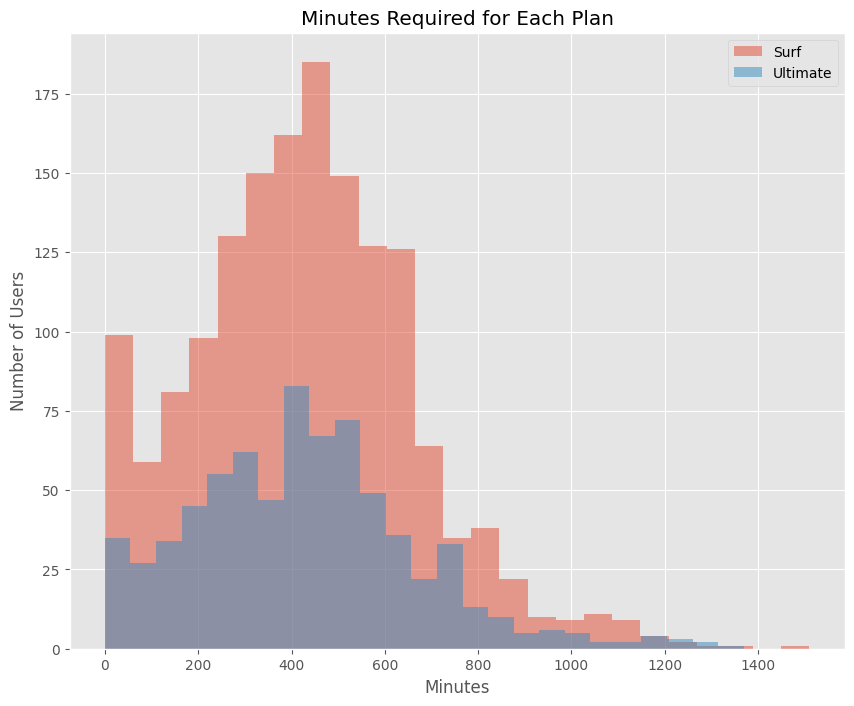

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
#plot style
plt.style.use('ggplot')
#plotting groupby
merged_df.groupby('plan_name')['minutes'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.title('Minutes Required for Each Plan')
plt.xlabel('Minutes')
plt.ylabel('Number of Users')
plt.legend(['Surf', 'Ultimate'])
plt.show()


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Nice chart! I also prefer this style. 

</div>

In [63]:
# Calculate the mean and the variance of the monthly call duration

#surf_client_minutes = merged_df[merged_df['plan_name'] == 'surf'].groupby('user_id')['minutes'].mean().agg(['mean', 'var', 'std'])
#ultimate_client_minutes = merged_df[merged_df['plan_name'] == 'ultimate'].groupby('user_id')['minutes'].mean().agg(['mean', 'var', 'std'])

surf_data = merged_df[merged_df['plan_name'] == 'surf']
ultimate_data = merged_df[merged_df['plan_name'] == 'ultimate']

#Surf var, mean, std
var_surf_duration = round(np.var(surf_data['minutes']),2)
mean_surf_duration = round(surf_data['minutes'].mean(),2)
std_surf_duration = round(np.sqrt(var_surf_duration),2)

#Ultimate var, mean, std
var_ultimate_duration = round(np.var(ultimate_data['minutes']),2)
mean_ultimate_duration = round(ultimate_data['minutes'].mean(),2)
std_ultimate_duration = round(np.sqrt(var_ultimate_duration),2)



print(f'Variance for monthly call duration in Surf plan is : {var_surf_duration}.')
print(f'Mean for monthly call duration in Surf plan is : {mean_surf_duration}.')
print(f'Standard deviation for monthly call duration in Surf plan is : {std_surf_duration}.')

print(f'Variance for monthly call duration in Ultimate plan is : {var_ultimate_duration}.')
print(f'Mean for monthly call duration in Ultimate plan is : {mean_ultimate_duration}.')
print(f'Standard deviation for monthly call duration in Ultimate plan is : {std_ultimate_duration}.')



#display(surf_client_minutes.round(2))

#display(ultimate_client_minutes.round(2))


Variance for monthly call duration in Surf plan is : 54933.33.
Mean for monthly call duration in Surf plan is : 428.75.
Standard deviation for monthly call duration in Surf plan is : 234.38.
Variance for monthly call duration in Ultimate plan is : 57764.13.
Mean for monthly call duration in Ultimate plan is : 430.45.
Standard deviation for monthly call duration in Ultimate plan is : 240.34.


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Statistics should be calculated without grouping the data by users, since grouping reduces the variance. The `merged_df` is already aggregated. We don't need to calculate mean of mean values. Instead, we need to calculate mean of the whole data array. 
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Correct!     
</div>


Mean for Surf Plan :
    428.75   


Variance for Surf Plan : 
    54933.33
    
Standard Deviation for Surf Plan : 
    234.38

Mean for Ultimate Plan : 
    430.45
    
Variance for Ultimate Plan : 
    57764.13
    
Standard Deviation for Ultimate Plan : 
    240.34 


I can conclude that while both plans are very similar, the call duration for the Surf plan is more consistent. It is lower in variance and standard deviation compared to Ultimates variance and standard deviation. Ultimate plan users exhibit a slightly higher level of variability in their monthly call durations compared to Surf plan users.

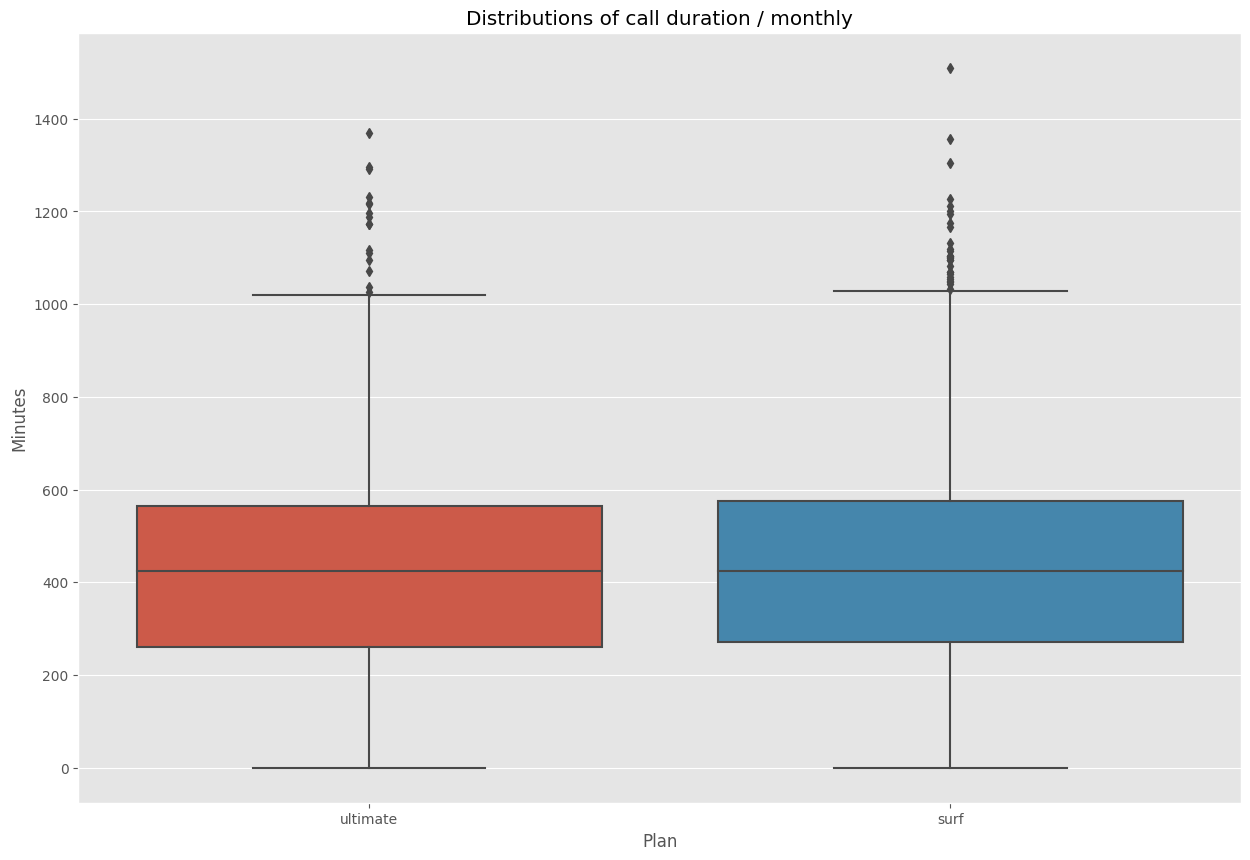

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration

#setting plot size
plt.figure(figsize=(15,10))

#data implementation
sns.boxplot(x = 'plan_name', y = 'minutes', data = merged_df)

#formatting of plot
plt.title('Distributions of call duration / monthly')
plt.xlabel('Plan')
plt.ylabel('Minutes')
plt.show()


We can see both are relatively similar as it should be as we can see the info on mean, var, and std prior to plotting. We can see there is a fair amount of outliers but to conclude the general information : mean of around 415 minutes per month from both of the plans.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
The histograms also tell us that Ultimate clients can use as many minutes as they want, while Surf clients have to remember about low lmits.  

</div>

### Messages

<Figure size 1500x1000 with 0 Axes>

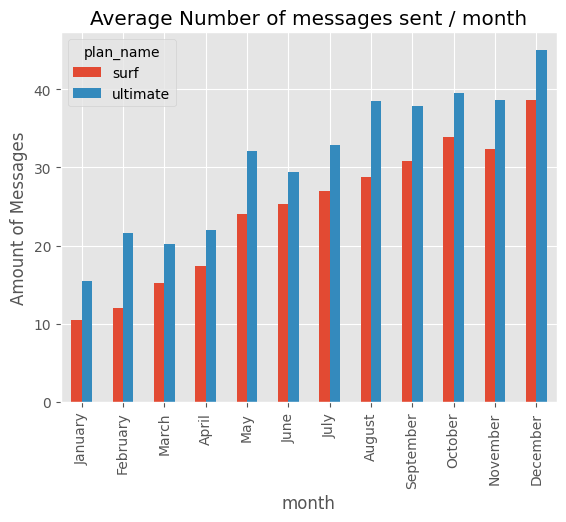

In [34]:
# Compare the number of messages users of each plan tend to send each month


#setting plot size
plt.figure(figsize=(15,10))

#list of ordered months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#applying ordered months
merged_df['month'] = pd.Categorical(merged_df['month'], categories=month_order, ordered=True)

#formatting
merged_df.groupby(['plan_name', 'month'])['messages'].mean().unstack(level=0).plot(kind='bar')
plt.title('Average Number of messages sent / month')
plt.ylabel('Amount of Messages')
plt.show()


Ultimate users are far from reaching their monthly limit that offers 1,000 prepaid messages. While the Surf users only have 50 messages giving them limitation. As in december they reach about 45 messages.

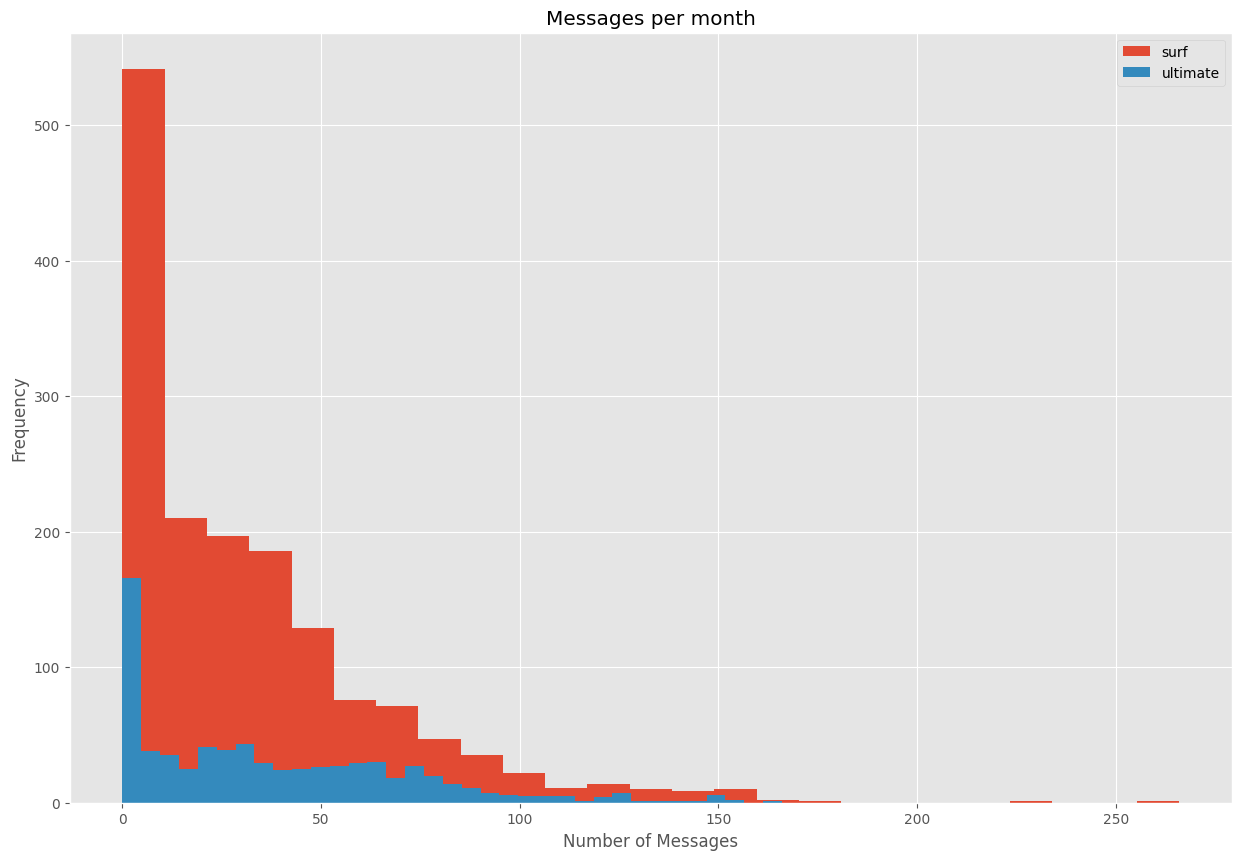

,mean,std,var
,messages,messages,messages
plan_name,,,
surf,31.159568,33.566717,1126.724522
ultimate,37.551389,34.767179,1208.756744


mean      31.159568
var     1126.724522
std       33.566717
Name: messages, dtype: float64

mean      37.551389
var     1208.756744
std       34.767179
Name: messages, dtype: float64

In [67]:
plt.figure(figsize=(15,10))

#Data from surf and ultimate
surf_data = merged_df[merged_df['plan_name'] == 'surf']['messages'].hist(bins=25, label = 'surf')
ultimate_data = merged_df[merged_df['plan_name'] == 'ultimate']['messages'].hist(bins=35, label = 'ultimate')

#formatting
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')
plt.title('Messages per month')
plt.legend()
plt.show()

#grouping mean, variance, and standard deviation
#surf_info = merged_df[merged_df['plan_name'] == 'surf']['messages'].agg(['mean', 'var', 'std'])
#ultimate_info = merged_df[merged_df['plan_name'] == 'ultimate']['messages'].agg(['mean', 'var', 'std'])


display(merged_df.pivot_table(index='plan_name', values=['messages'], aggfunc=['mean','std', 'var']))




display(surf_info)
display(ultimate_info)

Surf plan clients send an average of 33 messages monthly, slightly fewer than the 39 messages sent by Ultimate plan clients. Both have a similar standard deviation of around 31–32, often pushing Surf clients over their 50-message limit, leading to extra charges.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Same issue here.     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Seems like people rarely use messages.

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Great!     
</div>

### Internet

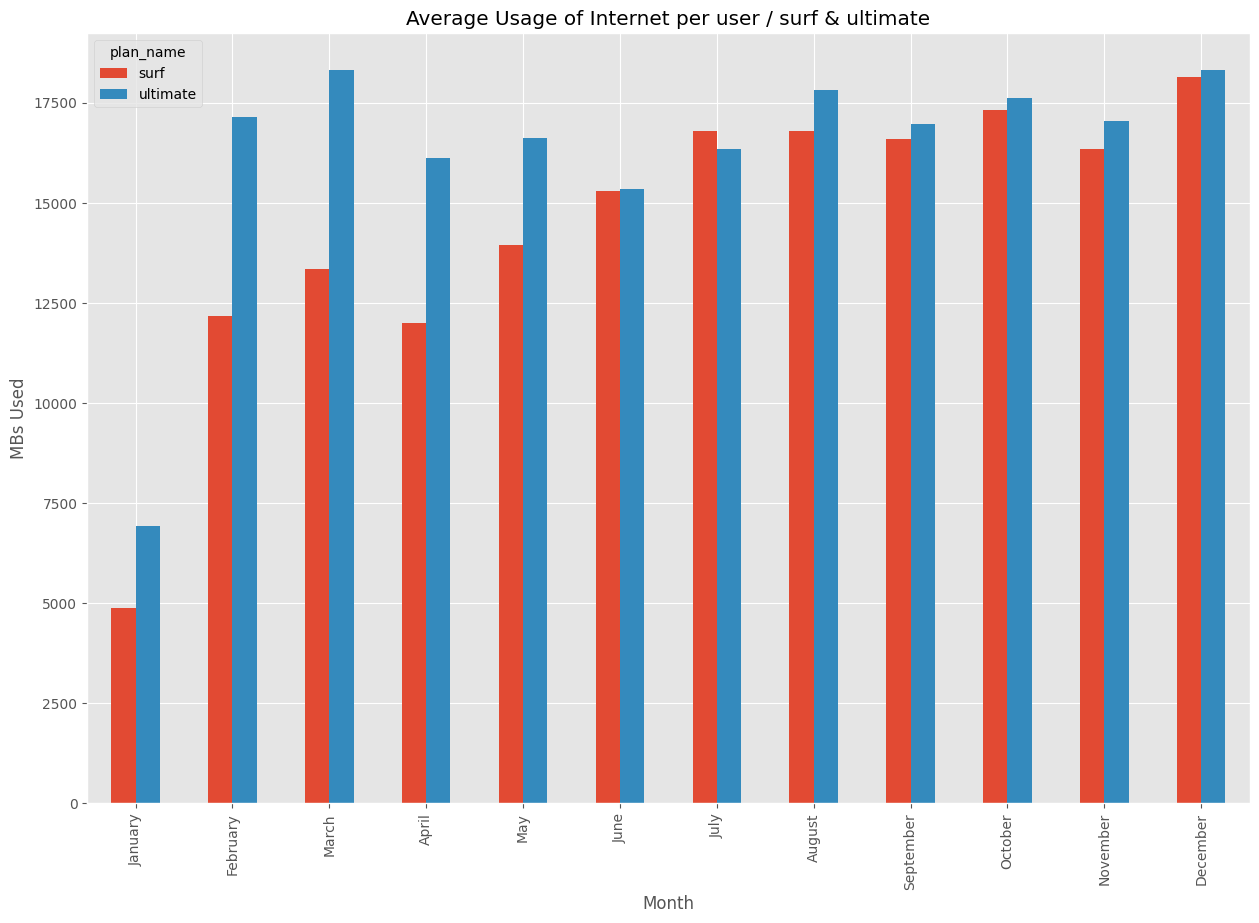

In [36]:
#plotting
merged_df.groupby(['plan_name', 'month'])['mb_used'].mean().unstack(level=0).plot(kind='bar', figsize = (15, 10))

#formatting
plt.title('Average Usage of Internet per user / surf & ultimate')
plt.xlabel('Month')
plt.ylabel('MBs Used')
plt.show()

Surf plan clients steadily increased their internet usage throughout the year, averaging around 16,500 MB by July—1,500 MB over their limit, leading to extra charges. Ultimate plan clients leveled off at 16,000 MB, staying well within their 30 GB limit.

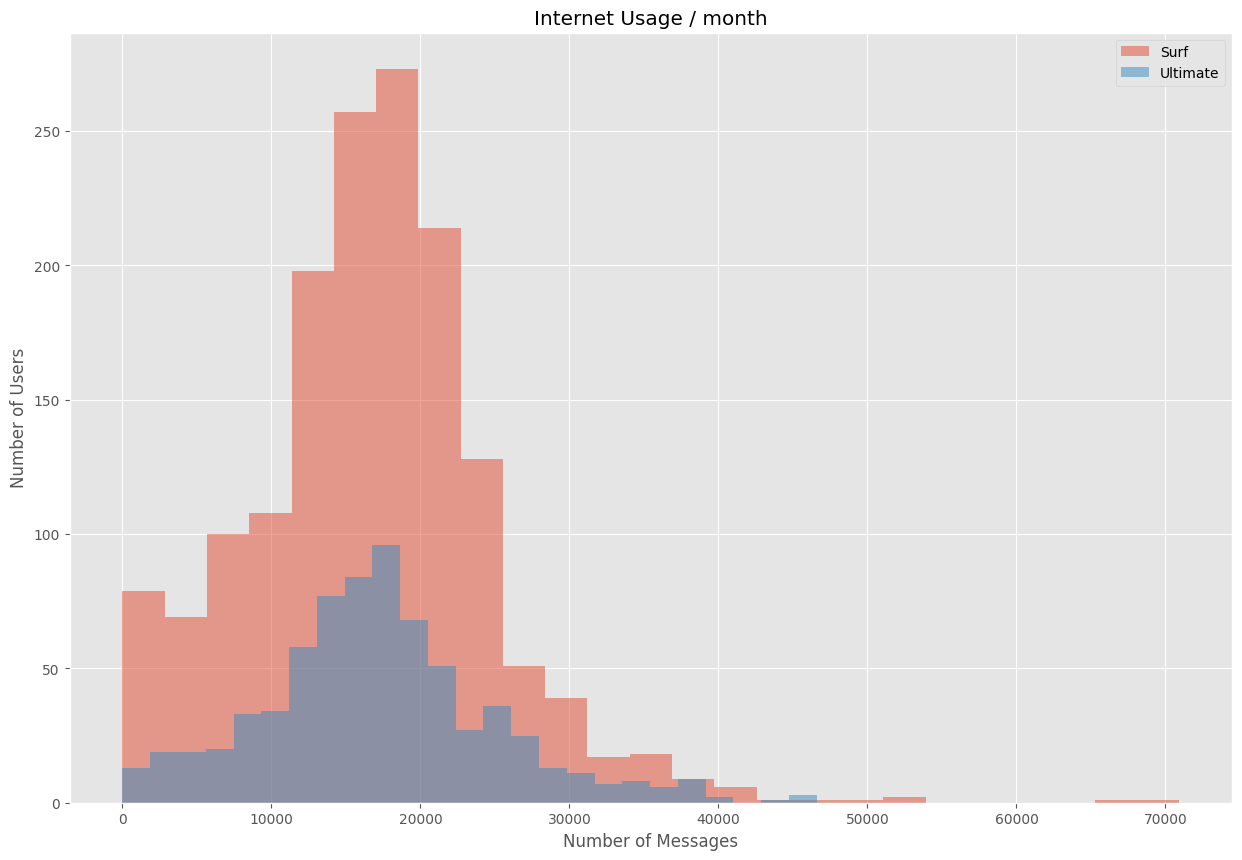

,mean,std,var
,mb_used,mb_used,mb_used
plan_name,,,
surf,16558.283490,8013.513327,6.421640e+07
ultimate,17214.699694,7851.897435,6.165229e+07


In [68]:
#plt.style.use('ggplot')

#plotting
merged_df.groupby('plan_name')['mb_used'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(15,10))
   
#formatting    
plt.legend(['Surf', 'Ultimate'])
plt.title('Internet Usage / month')
plt.xlabel('Number of Messages')
plt.ylabel('Number of Users')
   
plt.show()

#finding key values
merged_df.pivot_table(index='plan_name', values=['mb_used'], aggfunc=['mean', 'std', 'var'])



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
This pivot table is correct here.     
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
It is enough to call `ggplot` once. </div>

Internet Usage Distribution: Both Surf and Ultimate plans have similar distributions of internet usage, with the Ultimate plan showing slightly higher average usage.

Mean: The average internet usage per month is slightly higher for Ultimate plan users (17,214 MB) compared to Surf plan users (16,558 MB).

Standard Deviation: The standard deviation for both plans is fairly similar, indicating that internet usage for both groups varies by a comparable amount each month.

Variance: Both plans have similar variance in internet usage, with the Surf plan having a slightly higher variance compared to the Ultimate plan , suggesting a wider spread of data for the Surf plan.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Agreed. 
    
</div>

## Revenue

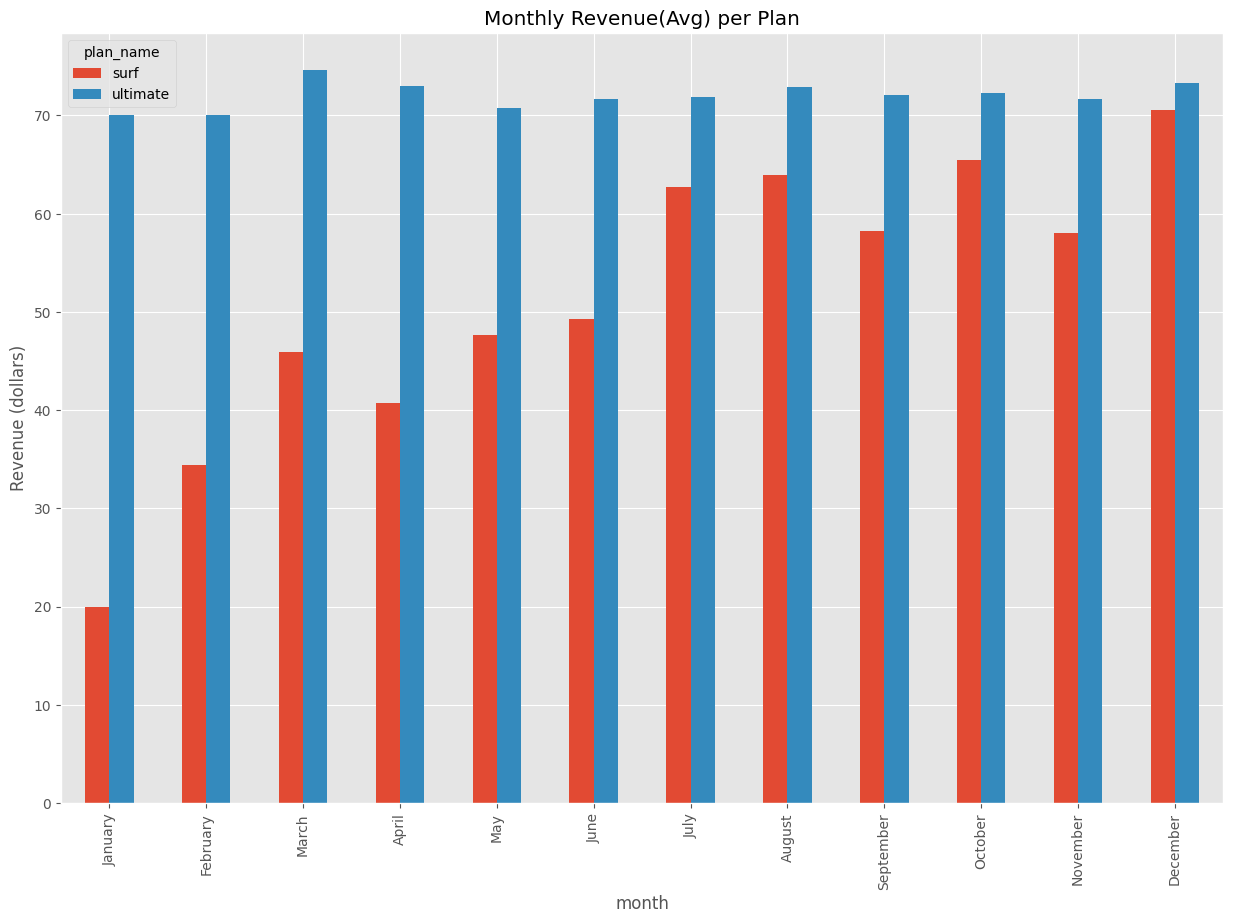

The mean income for the Surf plan is: 58.19434440501106
The mean income for the Ultimate plan is: 71.82328379334749


In [38]:
#grouped data
merged_df.groupby(['plan_name', 'month'])['income'].mean().unstack(level=0).plot(kind='bar', figsize = (15, 10))

#formatting
plt.title('Monthly Revenue(Avg) per Plan')
plt.ylabel('Revenue (dollars)')
plt.show()


surf_income_mean = merged_df[merged_df['plan_name'] == 'surf'].groupby('user_id')['income'].mean().mean()
ultimate_income_mean = merged_df[merged_df['plan_name'] == 'ultimate'].groupby('user_id')['income'].mean().mean()

print(f"The mean income for the Surf plan is: {surf_income_mean}")
print(f"The mean income for the Ultimate plan is: {ultimate_income_mean}")

The average income for the Ultimate plan is about 13% higher than the income from the Surf plan. Surf plan revenue starts low early in the year and increases, peaking in December, when it nearly matches Ultimate plan revenue. However, we want to determine if the average monthly revenue per client is the same for each plan across all clients, not just this sample.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good!     
</div>

## Test statistical hypotheses

To test a statistical hypothesis we'll test if the average monthly revenue for Surf and Ultimate plans is equal (null hypothesis) or not (alternative hypothesis) using a t-test. The result will depend on the p-value.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
Correct. The null hypothesis always includes the equality sign. This is because the test does not understand exactly how we set the problem: we can say, for instance, let's make sure that they are not equal. Or that they are equal. And regardless of the purpose of our study, we always put equality at null hypothesis. Then the test result is interpreted correctly.

</div>   

In [71]:
# Test the hypotheses

#Data Slices
surf_test = merged_df[merged_df['plan_name'] == 'surf']['income']

ultimate_test = merged_df[merged_df['plan_name'] == 'ultimate']['income']

#General statistical significance - 5%
alpha = 0.05

#here is the ttest the variance will be to false since they arent the same
result = st.ttest_ind(surf_test, ultimate_test, equal_var=False)

print('p-value: ', result.pvalue)

if result.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

p-value:  3.1703905481135734e-15
We reject the null hypothesis


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

    
Please don't group data here as well. 
</div>   
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Exactly!     
</div>

From the results of the t-test, we can conclude that there is a statistically significant difference between the average income of clients on the Surf plan and those on the Ultimate plan. Since the p-value (3.17e-15) is much smaller than the alpha value of 0.05, we reject the null hypothesis. This means that the average income for the two plans is not equal, and there is enough evidence to suggest a significant difference in income between clients on the Surf plan and those on the Ultimate plan.

In [40]:
merged_df = merged_df.join(users_df['city'])
display(merged_df.head(10))

,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,income,city
0,1000,December,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,30,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,October,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,15,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,September,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,15,20.00,"Las Vegas-Henderson-Paradise, NV MSA"
3,1001,November,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,15,60.00,"Tulsa, OK MSA"
4,1001,August,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,15,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
5,1001,December,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,15,60.00,"Dallas-Fort Worth-Arlington, TX MSA"
6,1002,October,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,15,20.00,"San Francisco-Oakland-Berkeley, CA MSA"
7,1002,November,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,15,60.00,"Grand Rapids-Kentwood, MI MSA"
8,1002,December,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,15,20.00,"Orlando-Kissimmee-Sanford, FL MSA"
9,1003,December,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,15,158.12,"San Jose-Sunnyvale-Santa Clara, CA MSA"


<h4>Null Hypothesis (H0): The revenue for NY-NJ users is equal to the revenue for users from other regions, with no significant difference.

Alternative Hypothesis (H1): The revenue for NY-NJ users is different from the revenue for users from other regions.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Correct.     
</div>

In [41]:
# Test the hypotheses
 
#Data Slices
ny_nj = merged_df[merged_df['city'].str.contains('NY-NJ', na=False)]['income']
other_regions = merged_df[~merged_df['city'].str.contains('NY-NJ', na=False )]['income']


#General statistical significance - 5%
alpha = 0.05

result = st.ttest_ind(ny_nj, other_regions)

print('pvalue: ', result.pvalue)

if result.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


pvalue:  0.7800525447306308
We can't reject the null hypothesis


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
This one is correct!     
</div>   

We cannot reject the null hypothesis because the p-value (0.7801) is much greater than the alpha level of 0.05. This means there is no significant difference between the average incomes of clients from the 'NY-NJ' region and other regions.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
How would H0 and H1 sound? 

</div>

<h2>General conclusion



At the start of the report, I imported necessary Python libraries and read the CSV files into DataFrames. The data was then prepared for analysis by converting date strings to datetime objects, correcting internet usage limits, and adding columns for month and year. Call durations were rounded to the nearest whole minute.

After preparing the data, we aggregated it by user and month, calculating total calls, call minutes, messages, and internet usage. We then calculated average monthly values for each media and revenue, and plotted the results for both the Surf and Ultimate plans, comparing call minutes, messages, internet usage, and revenue.

Clients on the Ultimate plan typically stay within their data limits and pay only the standard 70 dollar fee. In contrast, many Surf plan clients exceed their data limits and pay extra, with at least a quarter paying more than 40 dollars in overage fees. A significant portion of Surf plan clients exceed the 15 GB limit, with some paying up to 80 dollars or more. Since the Surf plan has more clients and greater potential for extra revenue, Megaline should focus on attracting more customers to the Surf plan to maximize revenue.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>

    
Excellent job, thank you very much! 

</div>   

<div class="alert alert-info">
<h2> Student's comment</h2>

Thank you for helping me improve my analysis! :)
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Thank you for such a great project! :)     
</div>